<a href="https://colab.research.google.com/github/bhavanireddyalla/OIBSIP/blob/main/UnemploymentAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UnemploymentAnalysis/UnemploymentinIndia.csv")

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
#description of data frame
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#data cleaning (checking for null and missing values)
df.isnull().sum()

Region                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Area                                   0
dtype: int64

In [ ]:
df.columns = ["Region","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Area"]

<ipython-input-63-6461163051d9>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



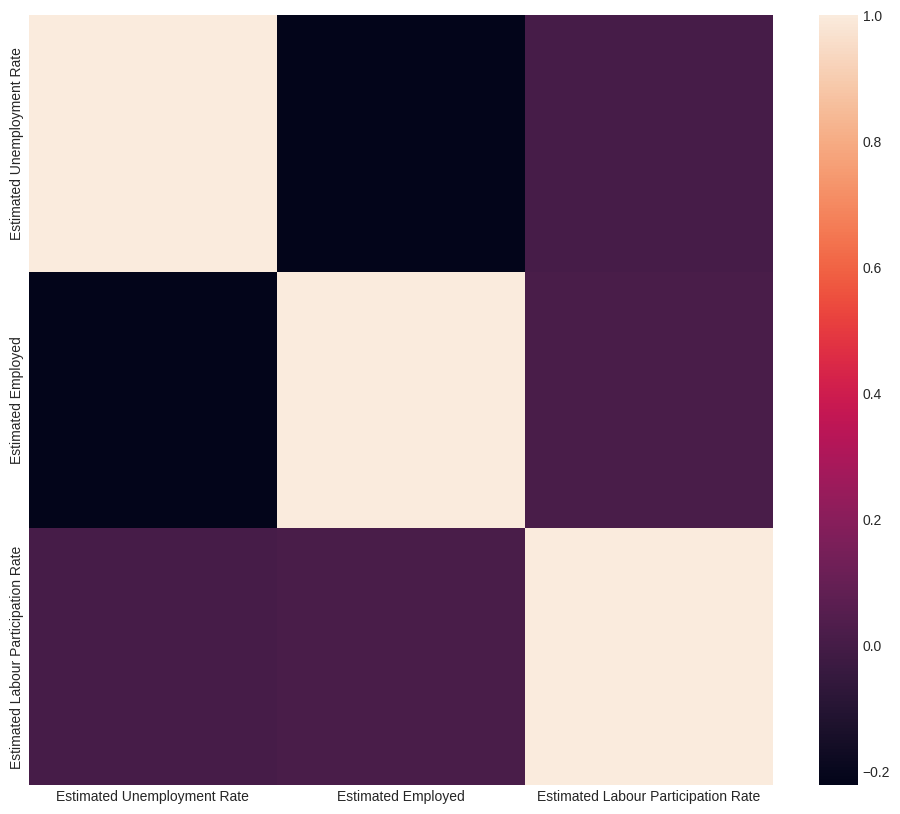

In [ ]:
#CORELATION between the features of the dataset
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (12,10))
sns.heatmap(df.corr())
plt.show()

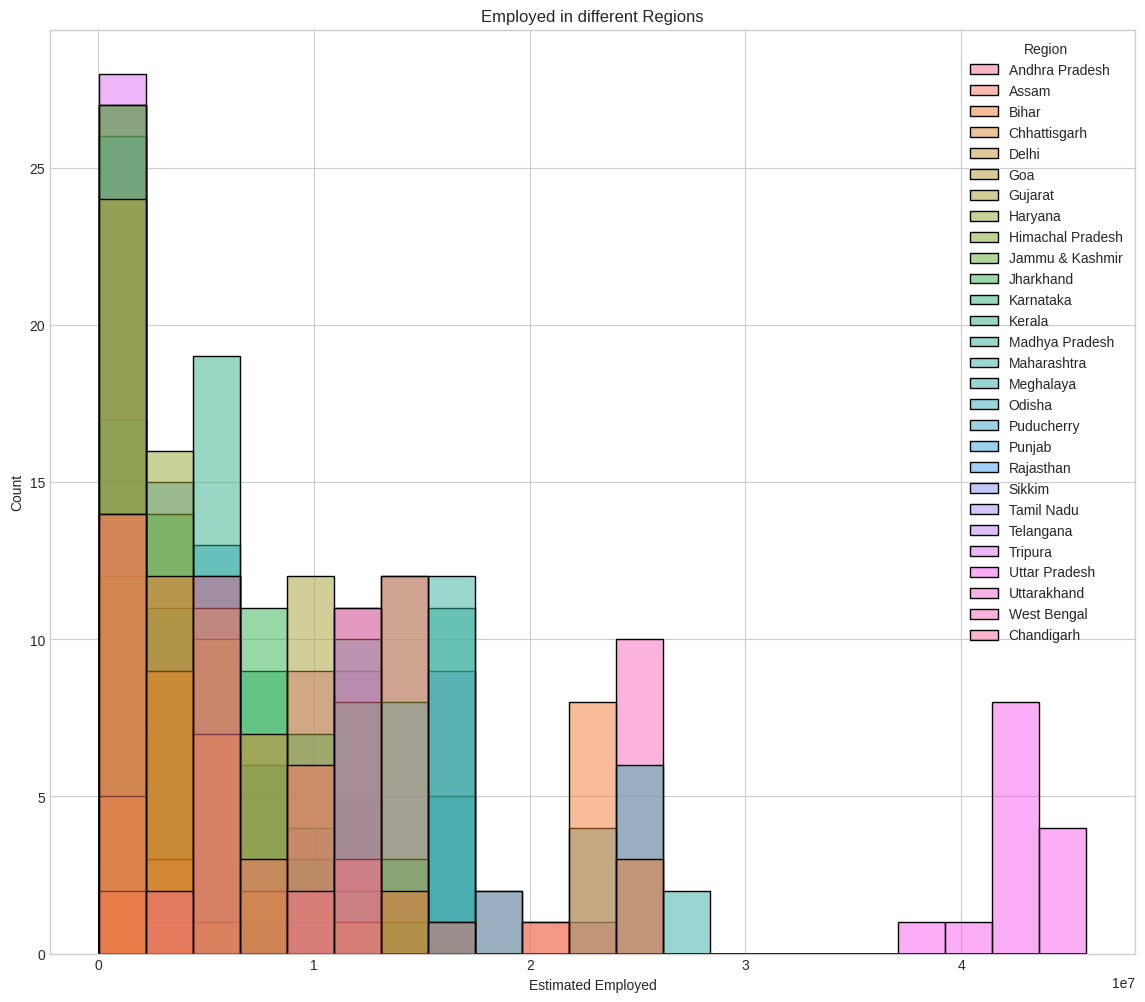

In [ ]:
#Data Visualization

df.columns = ["Region","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Area"]
plt.figure(figsize = (14,12))
plt.title("Employed in different Regions")

sns.histplot(x="Estimated Employed", hue = "Region", data = df)
plt.show()

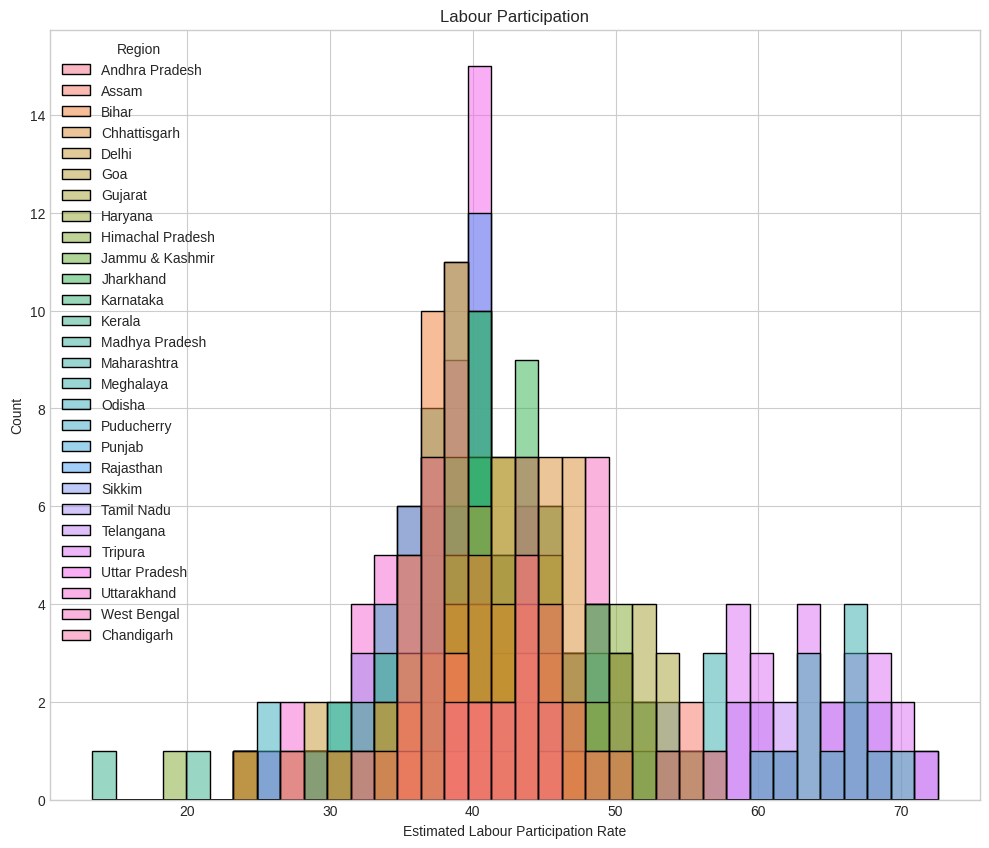

In [ ]:
df.columns = ["Region","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Area"]
plt.figure(figsize = (12,10))
plt.title("Labour Participation")
sns.histplot(x='Estimated Labour Participation Rate',hue = "Region",data = df)
plt.show()

In [ ]:
df = df.dropna()
df[[df.columns[0],df.columns[3]]]

,Region,Estimated Unemployment Rate
0,Andhra Pradesh,3.65
1,Andhra Pradesh,3.05
2,Andhra Pradesh,3.75
3,Andhra Pradesh,3.32
4,Andhra Pradesh,5.17
...,...,...
749,West Bengal,7.55
750,West Bengal,6.67
751,West Bengal,15.63
752,West Bengal,15.22


In [ ]:
fg = px.bar(df,x = 'Region',y='Estimated Unemployment Rate',color = 'Region',
            title='Unemployment Rate(State Wise)',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

DASHBOARD TO SHOW THE UNEMPLOYMENT IN INDIA STATE-WISE AND AREA-WISE

In [ ]:
unemployment = df[["Region","Area","Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path = ["Area","Region"],
                     values = "Estimated Unemployment Rate",
                     width = 700, height = 700, color_continuous_scale = "RdY1Gn",
                     title = "Unemployment Rate in India over Different Areas in Different States")
figure.show()